In [1]:
%pip install -U pip 
%pip install scikit-learn==0.20.3

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.2.2
    Uninstalling pip-19.2.2:
      Successfully uninstalled pip-19.2.2
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 5.4MB 2.8MB/s 
ERROR: allennlp 0.8.4 requires awscli>=1.11.91, which is not installed.
ERROR: allennlp 0.8.4 requires flaky, which is not installed.
ERROR: allennlp 0.8.4 requires responses>=0.7, which is not installed.
ERROR: tsfresh 0.12.0 has requirement pandas<=0.23.4,>=0.20.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.5.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.17.0 which is incompatible.
ERROR: imbalanced-learn 0.5.0 has requirement scikit-learn>=0.21, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: fancyimpute

In [2]:
!pip list |grep scikit-learn

scikit-learn                       0.20.3              


In [3]:
import sklearn
print(sklearn.__version__)

0.20.3


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-share-demand/train.csv
/kaggle/input/bike-share-demand/sampleSubmission.csv
/kaggle/input/bike-share-demand/test.csv


## Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import pandas_profiling as pp

In [6]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [7]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

In [8]:
warnings.filterwarnings("ignore")

## Read Data

In [9]:
df_train = pd.read_csv(dirname+'/train.csv')
df_test = pd.read_csv(dirname+'/test.csv')

In [10]:
df_train.head()

datetime  season  holiday  weekday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  cnt
0  2011-01-01 00:00:00       1        0        6           0        1  0.24  0.2879      0.81        0.0       3          13   16
1  2011-01-01 01:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       8          32   40
2  2011-01-01 02:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       5          27   32
3  2011-01-01 03:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       3          10   13
4  2011-01-01 04:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       0           1    1

In [11]:
df_test.head()

datetime  season  holiday  weekday  workingday  weather  temp   atemp  humidity  windspeed
0  2011-01-20 00:00:00       1        0        4           1        1  0.26  0.2273      0.56     0.3881
1  2011-01-20 01:00:00       1        0        4           1        1  0.26  0.2727      0.56     0.0000
2  2011-01-20 02:00:00       1        0        4           1        1  0.26  0.2727      0.56     0.0000
3  2011-01-20 03:00:00       1        0        4           1        1  0.26  0.2576      0.56     0.1642
4  2011-01-20 04:00:00       1        0        4           1        1  0.26  0.2576      0.56     0.1642

In [12]:
pp.ProfileReport(df_train)

In [13]:
pp.ProfileReport(df_test)

## Feature Preprocessing and Generation

In [14]:
df_train.isna().sum()

datetime      0
season        0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Datetime Preprocessing

Given datetime, we will divide each of datetime into year,month, and day

In [15]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['hour'] = df_train['datetime'].map(lambda x :x.hour)
df_train['day'] = df_train['datetime'].map(lambda x:x.day)
df_train['year'] = df_train['datetime'].map(lambda x:x.year)
df_train['month'] = df_train['datetime'].map(lambda x:x.month)
df_train['day_of_week'] = df_train['datetime'].map(lambda x:x.dayofweek)

In [16]:
df_train.head()

datetime  season  holiday  weekday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  cnt  hour  day  year  month  day_of_week
0 2011-01-01 00:00:00       1        0        6           0        1  0.24  0.2879      0.81        0.0       3          13   16     0    1  2011      1            5
1 2011-01-01 01:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       8          32   40     1    1  2011      1            5
2 2011-01-01 02:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       5          27   32     2    1  2011      1            5
3 2011-01-01 03:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       3          10   13     3    1  2011      1            5
4 2011-01-01 04:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       0           1    1     4    1  2011      1            5

In [17]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['hour'] = df_test['datetime'].map(lambda x :x.hour)
df_test['day'] = df_test['datetime'].map(lambda x:x.day)
df_test['year'] = df_test['datetime'].map(lambda x:x.year)
df_test['month'] = df_test['datetime'].map(lambda x:x.month)
df_test['day_of_week'] = df_test['datetime'].map(lambda x:x.dayofweek)

In [18]:
df_test.head()

datetime  season  holiday  weekday  workingday  weather  temp   atemp  humidity  windspeed  hour  day  year  month  day_of_week
0 2011-01-20 00:00:00       1        0        4           1        1  0.26  0.2273      0.56     0.3881     0   20  2011      1            3
1 2011-01-20 01:00:00       1        0        4           1        1  0.26  0.2727      0.56     0.0000     1   20  2011      1            3
2 2011-01-20 02:00:00       1        0        4           1        1  0.26  0.2727      0.56     0.0000     2   20  2011      1            3
3 2011-01-20 03:00:00       1        0        4           1        1  0.26  0.2576      0.56     0.1642     3   20  2011      1            3
4 2011-01-20 04:00:00       1        0        4           1        1  0.26  0.2576      0.56     0.1642     4   20  2011      1            3

### Numerical Preprocessing
Most of the numerical value are already normalized so we don't need to normalize it anymore but let's normalize the rest

In [19]:
for col in ['casual', 'registered', 'cnt']:
    df_train['%s_log' % col] = np.log1p(df_train[col])

## EDA

After preprocessing and generation let's dive deeper into the features

### Date + Categorical Features

In [20]:
df_train['date'] = df_train['datetime'].apply(lambda x:x.date())

In [21]:
eda_date = pd.DataFrame(df_train.groupby('date').sum()['cnt']).reset_index()
eda_date.head()

date   cnt
0  2011-01-01   985
1  2011-01-02   801
2  2011-01-03  1349
3  2011-01-04  1562
4  2011-01-05  1600

In [22]:
fig = px.line(eda_date, x='date', y='cnt')
fig.show()

In [23]:
eda_date = pd.DataFrame(df_train.groupby(['weekday','month','year']).mean()['cnt']).reset_index()
eda_date.head()

weekday  month  year         cnt
0        0      1  2011   39.816901
1        0      1  2012  111.527778
2        0      2  2011   68.340426
3        0      2  2012   99.513889
4        0      3  2011   65.695652

In [24]:
fig = px.bar(eda_date, x='weekday', y='cnt', facet_col='month', facet_row='year')
fig.show()

From both of the graph above we can kinda see that there is a good trend happen with 2012 as general is a better year than 2011 with both of them have a trend where it will going up from early to mid year and then slowly going down by the end of year

In [25]:
eda_date = pd.DataFrame(df_train.groupby(['hour','holiday', 'workingday']).mean()['cnt']).reset_index().dropna()
eda_date.head()

hour  holiday  workingday        cnt
0     0        0           0  97.219697
1     0        0           1  36.732258
2     0        1           0  66.769231
3     1        0           0  74.734848
4     1        0           1  16.003236

In [26]:
fig = px.bar(eda_date, x='hour', y='cnt', facet_col='holiday', facet_row='workingday')
fig.show()

We can clearly see the different between holiday and workday with there are sudden increase on workday in hour 8, 17, 18 i think it's have something to do with the time when people come home from work, let's see whether it's the same behaviour in weekday vs weekend

In [27]:
eda_date = pd.DataFrame(df_train.groupby(['hour','weekday','month']).mean()['cnt']).reset_index()
eda_date.head()

hour  weekday  month        cnt
0     0        0      1  46.500000
1     0        0      2  46.800000
2     0        0      3  67.600000
3     0        0      4  66.833333
4     0        0      5  93.400000

In [28]:
fig = px.bar(eda_date, x='hour', y='cnt', facet_col='weekday',facet_row='month')
fig.show()

We can the same behaviour on every month with workday have sudden increase when it's come home time

In [29]:
eda_date = pd.DataFrame(df_train.groupby(['day','month','holiday','year']).sum()['cnt']).reset_index().dropna()
eda_date.head()

day  month  holiday  year   cnt
0    1      1        0  2011   985
1    1      1        0  2012  2294
2    1      2        0  2011  1360
3    1      2        0  2012  4579
4    1      3        0  2011  1851

In [30]:
fig = px.bar(eda_date, x='day', y='cnt', facet_col='month', facet_row='year', color='holiday')
fig.show()

Don't think there any more significance change from Holiday

In [31]:
eda_date = pd.DataFrame(df_train.groupby(['hour','weather', 'weekday']).mean()['cnt']).reset_index().dropna()
eda_date.head()

hour  weather  weekday         cnt
0     0        1        0  104.690476
1     0        1        1   34.872340
2     0        1        2   29.305556
3     0        1        3   35.441860
4     0        1        4   41.238095

In [32]:
fig = px.bar(eda_date, x='hour', y='cnt', facet_col='weekday', facet_row='weather')
fig.show()

In [33]:
eda_date = pd.DataFrame(df_train.groupby(['hour','weather', 'workingday']).mean()['cnt']).reset_index().dropna()
eda_date.head()

hour  weather  workingday         cnt
0     0        1           0  102.170000
1     0        1           1   39.200980
2     0        2           0   80.585366
3     0        2           1   34.170732
4     0        3           0   45.000000

In [34]:
fig = px.bar(eda_date, x='hour', y='cnt', facet_col='weather', facet_row='workingday')
fig.show()

We can see a decreasing trend on weather but still the same behaviour on working day and holiday

In [35]:
eda_date = pd.DataFrame(df_train.groupby(['hour','weekday','season']).mean()['cnt']).reset_index()
eda_date.head()

hour  weekday  season         cnt
0     0        0       1   53.187500
1     0        0       2   97.882353
2     0        0       3  131.705882
3     0        0       4   99.812500
4     0        1       1   16.066667

In [36]:
fig = px.bar(eda_date, x='hour', y='cnt', facet_col='weekday',facet_row='season')
fig.show()

### Numercial Feature

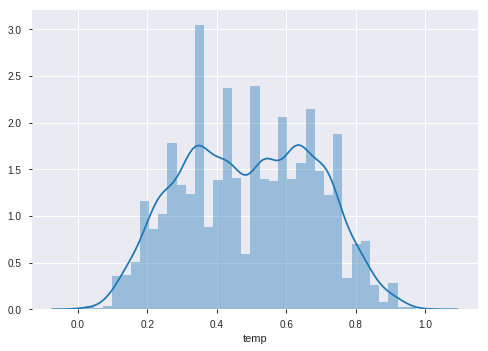

In [37]:
sns.distplot(df_train['temp'])

In [38]:
eda_num = pd.DataFrame(df_train.groupby(['temp']).mean()['cnt']).reset_index().dropna()
eda_num.head()

temp        cnt
0  0.02  77.714286
1  0.04  91.500000
2  0.06  43.000000
3  0.08  19.272727
4  0.10  50.272727

In [39]:
fig = px.scatter(eda_num,x='temp',y='cnt')
fig.show()

We can see a positive trend on count and temp, let's divide for each weekday

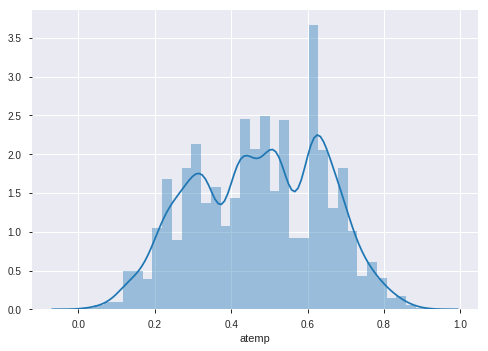

In [40]:
sns.distplot(df_train['atemp'])

In [41]:
eda_num = pd.DataFrame(df_train.groupby(['atemp']).mean()['cnt']).reset_index().dropna()
eda_num.head()

atemp        cnt
0  0.0152   1.000000
1  0.0303   3.000000
2  0.0455  38.000000
3  0.0606  82.285714
4  0.0758  39.062500

In [42]:
fig = px.scatter(eda_num,x='atemp',y='cnt')
fig.show()

The same behaviour as temp,given that both of them are highly correlated

In [43]:
eda_num = pd.DataFrame(df_train.groupby(['temp', 'weekday']).mean()['cnt']).reset_index().dropna()
eda_num.head()

temp  weekday        cnt
0  0.02        3  77.714286
1  0.04        3  91.500000
2  0.06        3  43.000000
3  0.08        0  12.666667
4  0.08        3  19.333333

In [44]:
fig = px.scatter(eda_num, x='temp', y='cnt', facet_row='weekday')
fig.show()

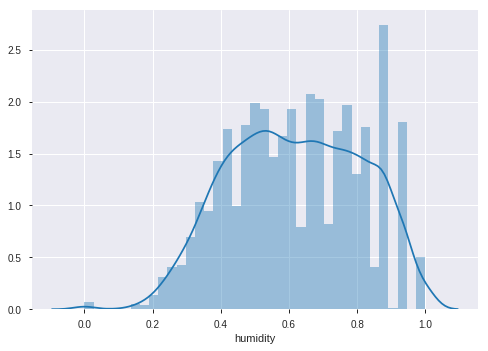

In [45]:
sns.distplot(df_train['humidity'])

In [46]:
eda_num = pd.DataFrame(df_train.groupby(['humidity']).mean()['cnt']).reset_index().dropna()
eda_num.head()

humidity         cnt
0      0.00   28.318182
1      0.08   77.000000
2      0.10  107.000000
3      0.12   29.000000
4      0.13   17.000000

In [47]:
fig = px.scatter(eda_num,x='humidity',y='cnt')
fig.show()

Negative trend for humidity and count here

In [48]:
eda_num = pd.DataFrame(df_train.groupby(['humidity','weekday']).mean()['cnt']).reset_index().dropna()
eda_num.head()

humidity  weekday         cnt
0      0.00        4   28.318182
1      0.08        5   77.000000
2      0.10        5  107.000000
3      0.12        6   29.000000
4      0.13        6   17.000000

In [49]:
fig = px.scatter(eda_num, x='humidity', y='cnt', facet_row='weekday')
fig.show()

In [50]:
fig = px.box(df_train,y='cnt',x='hour',color='weekday')
fig.show()

Not so significance on day-level

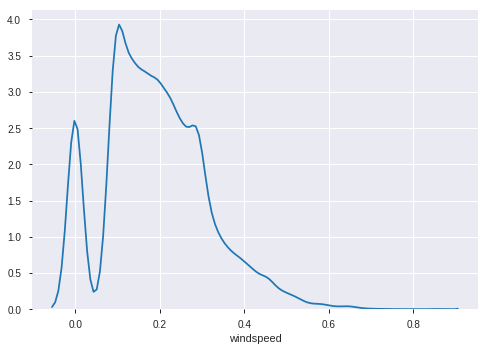

In [51]:
sns.distplot(df_train['windspeed'],hist=False)

In [52]:
eda_num = pd.DataFrame(df_train.groupby(['windspeed']).mean()['cnt']).reset_index().dropna()
eda_num.head()

windspeed         cnt
0     0.0000  161.101295
1     0.0896  147.864679
2     0.1045  169.852031
3     0.1343  175.645536
4     0.1642  202.262062

In [53]:
fig = px.scatter(eda_num,x='windspeed',y='cnt')
fig.show()

## What we get from EDA

- There are clear different behaviour between working day and not working day (holiday and weekend)
    - We can make new feature based on is it working hour or not
- Weather  have negative corelation with count
- Year have positive corelation with count
- Humidity have a weak negative corelation with count
- Temp have a weak negative corelation with count
- Season is not have linear relationship with count
- There some outlier on count
    - we can drop outlier on hour level

## Feature Engineering

In [54]:
# df_train['working_hour'] = df_train['hour'].apply(lambda x: x >=9 and x <17)
# df_train['night'] = df_train['hour'].apply(lambda x: x  <=6)
# df_train['year'] = df_train['year'].apply(lambda x: x  ==2012)
# df.drop(['date','datetime'])

In [55]:
df_train.head()

datetime  season  holiday  weekday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  cnt  hour  day  year  month  day_of_week  casual_log  registered_log   cnt_log        date
0 2011-01-01 00:00:00       1        0        6           0        1  0.24  0.2879      0.81        0.0       3          13   16     0    1  2011      1            5    1.386294        2.639057  2.833213  2011-01-01
1 2011-01-01 01:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       8          32   40     1    1  2011      1            5    2.197225        3.496508  3.713572  2011-01-01
2 2011-01-01 02:00:00       1        0        6           0        1  0.22  0.2727      0.80        0.0       5          27   32     2    1  2011      1            5    1.791759        3.332205  3.496508  2011-01-01
3 2011-01-01 03:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       3          10   13     3    1  2011      1            5    1.386294        2.397895  2.639057  2011-01-01
4 2011-01-01 04:00:00       1        0        6           0        1  0.24  0.2879      0.75        0.0       0           1    1     4    1  2011      1            5    0.000000        0.693147  0.693147  2011-01-01

## Modelling

- After some discussion we will use voting with GradientBoostingRegressor and Random Forest as the base estimator
- We will also use Bayesian Optimization Hyperparameter tuning for Gradient Boosting and Random Search for Random Forest


In [56]:
# Metrics
from sklearn.metrics import mean_squared_error

# Model Selection
from sklearn.model_selection import KFold, cross_val_score

# Model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [57]:
X_train = df_train[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 
                    'holiday', 'workingday', 'season', 'hour', 'day_of_week', 'year']]
y_train_cas = df_train['casual_log']
y_train_reg = df_train['registered_log']

In [58]:
X_test = df_test[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 
    'holiday', 'workingday', 'season', 'hour', 'day_of_week', 'year']]

In [59]:
rf_train = df_train[['weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'weekday']]

rf_test = df_test[['weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday',
    'hour', 'weekday']]

In [60]:
kf = KFold(5)

### Gradient Boosting

In [61]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gb_cas = GradientBoostingRegressor(**params)
gb_reg = GradientBoostingRegressor(**params)

In [62]:
score_cas = cross_val_score(gb_cas,X_train,y_train_cas,cv=5,scoring='neg_mean_squared_error')
print(f'Casual CV Score: {score_cas.mean()} ± {score_cas.std()}')

Casual CV Score: -0.32139474338303586 ± 0.0783414893775448


In [63]:
score_reg = cross_val_score(gb_reg,X_train,y_train_reg,cv=5,scoring='neg_mean_squared_error')
print(f'CV Score: {score_reg.mean()} ± {score_reg.std()}')

CV Score: -0.17264575246947605 ± 0.13630240008339797


### Random Forest

In [64]:
rf_cas = RandomForestRegressor(n_estimators = 1000, 
    min_samples_split = 12, 
    n_jobs = -1,
    random_state = 123, )
rf_reg = RandomForestRegressor(n_estimators = 1000, 
    min_samples_split = 12, 
    n_jobs = -1,
    random_state = 123, )

In [65]:
score_cas = cross_val_score(rf_cas,rf_train,y_train_cas,cv=5,scoring='neg_mean_squared_error')
print(f'Casual CV Score: {score_cas.mean()} ± {score_cas.std()}')

Casual CV Score: -0.4112704847084149 ± 0.09272762307944042


In [66]:
score_reg = cross_val_score(rf_reg,rf_train,y_train_reg,cv=5,scoring='neg_mean_squared_error')
print(f'CV Score: {score_reg.mean()} ± {score_reg.std()}')

CV Score: -0.3537998505297632 ± 0.14759789139918972


## Predict

In [67]:
gb_cas.fit(X_train,y_train_cas)
gb_reg.fit(X_train,y_train_reg)

y_pred_cas = gb_cas.predict(X_test)
y_pred_cas = np.exp(y_pred_cas) - 1


y_pred_reg = gb_reg.predict(X_test)
y_pred_reg = np.exp(y_pred_reg) - 1

In [68]:
# df_test['count'] = y_pred_cas + y_pred_reg
y_gb = y_pred_cas + y_pred_reg

y_gb[:20]

array([ 11.97143196,   5.0635004 ,   2.75518139,   1.91065157,
         1.65073846,   6.58706828,  32.45882499, 107.83058443,
       230.72855475, 126.51953439,  58.33737679,  63.93203166,
        81.17754539,  76.36039543,  70.25456102,  75.09022848,
        94.71091321, 179.99744071, 162.97154334, 120.48136124])

In [69]:
# params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
# model = GradientBoostingRegressor(**params)
rf_cas.fit(rf_train,y_train_cas)
rf_reg.fit(rf_train,y_train_reg)

y_pred_cas = rf_cas.predict(rf_test)
y_pred_cas = np.exp(y_pred_cas) - 1

y_pred_reg = rf_reg.predict(rf_test)
y_pred_reg = np.exp(y_pred_reg) - 1


y_rf = y_pred_cas + y_pred_reg

y_rf[:20]


array([ 14.06076414,   5.9991323 ,   2.8824053 ,   2.64329363,
         2.2981362 ,  11.40150165,  50.22386294, 152.59905349,
       298.74574486, 177.91830286,  95.8314852 ,  92.66943271,
       103.68163631,  99.14641607, 108.48586447, 105.06400679,
       107.80401385, 234.59486368, 231.24038827, 170.33057264])

In [70]:
y_voting = .2*y_rf + .8*y_gb

In [71]:
y_voting[:20]

array([ 12.3892984 ,   5.25062678,   2.78062617,   2.05717998,
         1.780218  ,   7.54995495,  36.01183258, 116.78427824,
       244.33199277, 136.79928808,  65.83619848,  69.67951187,
        85.67836357,  80.91759956,  77.90082171,  81.08498414,
        97.32953334, 190.9169253 , 176.62531232, 130.45120352])

In [72]:
df_test['count'] = y_voting

In [73]:
df_test['count'].head(10)

0     12.389298
1      5.250627
2      2.780626
3      2.057180
4      1.780218
5      7.549955
6     36.011833
7    116.784278
8    244.331993
9    136.799288
Name: count, dtype: float64

## SHAP

In [74]:
# import shap
# import lime

### Casual

In [75]:
# explainerSKGBT_cas = shap.TreeExplainer(gb_cas)
# shap_values_SKGBT_test_cas = explainerSKGBT_cas.shap_values(X_test)
# shap_values_SKGBT_train_cas = explainerSKGBT_cas.shap_values(X_train)

In [76]:
# # Scikit GBT
# df_shap_SKGBT_test_cas = pd.DataFrame(shap_values_SKGBT_test_cas, columns=X_test.columns.values)
# df_shap_SKGBT_train_cas = pd.DataFrame(shap_values_SKGBT_train_cas, columns=X_train.columns.values)

In [77]:
# # if a feature has 10 or less unique values then treat it as categorical
# categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
# for x in range(X_train.values.shape[1])]) <= 10).flatten()
 
# # LIME has one explainer for all models
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
# feature_names=X_train.columns.values.tolist(),
# class_names=['price'],
# categorical_features=categorical_features,
# verbose=True,
#                                                    mode='regression')

In [78]:
# shap.initjs()
# j=30
# shap.force_plot(explainerSKGBT_cas.expected_value, shap_values_SKGBT_test_cas[j], X_test.iloc[[j]])

In [79]:
# expSKGBT = explainer.explain_instance(X_test.values[j], gb_cas.predict, num_features=5)
# expSKGBT.show_in_notebook(show_table=True)

In [80]:
# shap.initjs()
# j=1000
# shap.force_plot(explainerSKGBT_cas.expected_value, shap_values_SKGBT_test_cas[j], X_test.iloc[[j]])

In [81]:
# expSKGBT = explainer.explain_instance(X_test.values[j], gb_cas.predict, num_features=5)
# expSKGBT.show_in_notebook(show_table=True)

### Registered

In [82]:
# explainerSKGBT_reg = shap.TreeExplainer(gb_reg)
# shap_values_SKGBT_test_reg = explainerSKGBT_reg.shap_values(X_test)
# shap_values_SKGBT_train_reg = explainerSKGBT_reg.shap_values(X_train)

In [83]:
# Scikit GBT
# df_shap_SKGBT_test_reg = pd.DataFrame(shap_values_SKGBT_test_reg, columns=X_test.columns.values)
# df_shap_SKGBT_train_reg = pd.DataFrame(shap_values_SKGBT_train_reg, columns=X_train.columns.values)

In [84]:
# shap.initjs()
# j=30
# shap.force_plot(explainerSKGBT_reg.expected_value, shap_values_SKGBT_test_reg[j], X_test.iloc[[j]])

In [85]:
# expSKGBT = explainer.explain_instance(X_test.values[j], gb_reg.predict, num_features=5)
# expSKGBT.show_in_notebook(show_table=True)

In [86]:
# j=1000
# shap.force_plot(explainerSKGBT_reg.expected_value, shap_values_SKGBT_test_reg[j], X_test.iloc[[j]])

In [87]:
# expSKGBT = explainer.explain_instance(X_test.values[j], gb_reg.predict, num_features=5)
# expSKGBT.show_in_notebook(show_table=True)

## Submission


In [88]:

submission = pd.read_csv(dirname+"/sampleSubmission.csv")

submission['count'] = df_test["count"]

submission.head(10)

submission.to_csv('submission35.csv',index=False)